In [1]:
%run 'function_definitions.ipynb'

In [2]:
response_file = './PTB_DATA/response_function/n100cm25nl50.rsp'

In [3]:
def read_response_file(fn):
    resp = []
    neutron_energies = []
    electron_energies = []
    
    with open(fn) as f:
        for i, line in enumerate(f):
            if i == 0:
                # Skip first line
                continue
            if (i - 1) % 373 == 0:
                
                neutron_energies.append(float(line.split(sep=' ')[2]))
                
                if i == 1:
                    split_line = (line.split(sep = ' '))
                    split_line = [float(x) for x in split_line if x != '']
                    electron_energies = np.linspace(split_line[2], split_line[3], split_line[1])
                    
                
                if i != 1:
                    # We finished a PHS (unless first time)! Let's append it to the array.
                    resp.append([np.array(phs)])
                # Reset pulse height spectrum
                phs = []
                continue
            split_line = line.split(sep=' ')
            bla = [float(n) for n in split_line if n != '']
            
            phs += bla            
            
    resp = np.concatenate(resp)
    neutron_energies = np.array(neutron_energies)
    return resp, neutron_energies, electron_energies

In [4]:
response, neutron_energies, electron_energies = read_response_file(response_file)

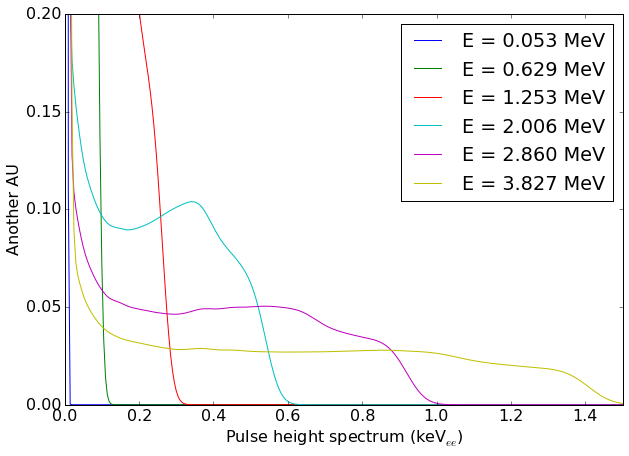

In [17]:
sel = np.array([True if (i%70== 0) and i< 400 else False for i in range(len(neutron_energies))]) #(neutron_energies > 2.4) & (neutron_energies < 2.6)

for phs, e in zip(response[sel], neutron_energies[sel]):
    plt.plot(electron_energies, phs, label='E = %.3f MeV' % e)
plt.xlabel('Pulse height spectrum (keV$_{ee}$)')
plt.ylabel('Another AU')
#plt.yscale('log')
plt.legend()
plt.xlim(0,1.5)
plt.ylim(0,0.2)
plt.show()

In [134]:
phs_2_5MeV = response[neutron_energies == 2.503]

In [11]:
len(sel)

959

In [10]:
zip(response[sel], neutron_energies[sel])

C:\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:1: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  if __name__ == '__main__':


In [14]:
len(neutron_energies[np.array(sel)])

10